In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import panel as pn
warnings.filterwarnings('ignore')

In [2]:
pn.extension('tabulator')

!pip install hvplot
import hvplot.pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 4.6 MB/s eta 0:00:00


#### Methane is responsible for around 30% of the rise in global temperatures since the Industrial Revolution, and rapid and sustained reductions in methane emissions are key to limiting near-term global warming and improving air quality. The energy sector – including oil, natural gas, coal and bioenergy – accounts for nearly 40% of methane emissions from human activity.


The following dataset has information about methane gas emissions globally. Details about the columns are as follows.

- region - region of the world
- country - Country of Emission.
- emissions - Methane Emissions in kt.
- type - Sector from which emissions occur.
- Segment- Sub-sector from which emissions occur.
- reason - The reason for the emission.
- baseYear - Base year for the tracking of emissions.
- notes - The source of data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <font color='red'>* Try answering the questions in Markdown from the dataset. *</font>

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Methane_final.csv", index_col=False)

In [5]:
df.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


#### 1) How many numerical and categorical columns are there in the dataset?

In [7]:
# We clearly see that there are 2 numerical and 7 categorical columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


In [9]:
df["baseYear"].value_counts()

,count
baseYear,
2022,1233
2019-2021,315


#### 2) Display the emission levels as present in the last 100 rows of data?

In [8]:
df.index,df.shape

(RangeIndex(start=0, stop=1548, step=1), (1548, 9))

In [10]:
df["emissions"]

,emissions
0,257.611206
1,0.052000
2,130.798996
3,69.741898
4,213.987000
...,...
1543,3102.500000
1544,30296.500000
1545,133350.984375
1546,9737.874023


#### 3) How many unique sectors in the data are responsible for emissions and which sector is captured most in the data?



In [11]:
# 4 unique sectors are responsible for emissions
df["type"].unique()

array(['Agriculture', 'Energy', 'Other', 'Waste'], dtype=object)

In [12]:
# Energy sector is captured most in the data
df["type"].value_counts()

,count
type,
Energy,1233
Agriculture,105
Other,105
Waste,105


In [13]:
df.groupby("type")["emissions"].sum()

,emissions
type,
Agriculture,292758.868769
Energy,537396.311526
Other,19766.646886
Waste,145838.417946


#### 4) What is the minimum and maximum emission level rounded upto 3 decimal places for a country like 'Algeria'?

In [14]:
round(df["emissions"].min(),3)

0.0

In [15]:
round(df["emissions"].max(),3)

141953.766

#### 5) Remove any leading and trailing spaces from the 'notes' column for all the rows and replace ' "Not avaialble" with "NA" '

In [16]:
df["notes"] = df["notes"].str.strip()
df["notes"] = df["notes"].replace("Not available", "NA")
df["notes"]

,notes
0,Average based on United Nations Framework Conv...
1,Estimates from end-uses are for 2020 or 2021 (...
2,NA
3,NA
4,NA
...,...
1543,NA
1544,NA
1545,Estimates from end-uses are for 2020 or 2021 (...
1546,Average based on United Nations Framework Conv...


#### 6) Display all those rows where the emission levels are more than the mean emission level?

In [17]:
df.emissions.mean()

643.2559723044416

In [18]:
df[df["emissions"] > df["emissions"].mean()]

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
8,8,Africa,Algeria,1154.119995,Energy,Onshore oil,Vented,2022,NA
12,12,Africa,Algeria,2669.194580,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
48,48,Africa,Botswana,843.401672,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...
67,67,Africa,Chad,1223.932983,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
118,118,Africa,Egypt,684.532227,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
...,...,...,...,...,...,...,...,...,...
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,NA
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,NA
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


#### 7) Are there any countries which have emissions from the 'Bioenergy' segment in the year '2022'?

In [19]:
df.baseYear.value_counts()

,count
baseYear,
2022,1233
2019-2021,315


In [20]:
df[(df["segment"] == "Bioenergy") & (df["baseYear"] == "2022")]["country"].unique()
# Yes there are countries which have emissions from the 'Bioenergy' segment in the year '2022'

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Cameroon', 'Congo',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana',
       'Kenya', 'Libya', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Senegal', 'Somalia', 'South Africa', 'South Sudan',
       'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Australia', 'Bangladesh',
       'China', 'India', 'Indonesia', 'Japan', 'Korea', 'Malaysia',
       'Mongolia', 'New Zealand', 'Other countries in Southeast Asia',
       'Pakistan', 'Philippines', 'Thailand', 'Vietnam', 'Argentina',
       'Bolivia', 'Brazil', 'Colombia', 'Cuba', 'Ecuador', 'Guyana',
       'Paraguay', 'Peru', 'Trinidad and Tobago', 'Uruguay', 'Venezuela',
       'Denmark', 'Estonia', 'European Union', 'France', 'Germany',
       'Israel', 'Italy', 'Netherlands', 'Norway',
       'Other countries in Europe', 'Other EU17 countries',
       'Other EU7 countries', 'Poland', 'Romania',

#### 8) Which region has the most emissons from the 'Onshore gas' more than the median emission levels ?

In [21]:
df['emissions'].median()

24.064668655395508

In [22]:
ondf = df[(df["emissions"] > df["emissions"].median()) & (df["segment"] == "Onshore gas")]
ondf

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,NA
5,5,Africa,Algeria,464.308014,Energy,Onshore gas,Vented,2022,NA
128,128,Africa,Egypt,40.961601,Energy,Onshore gas,Vented,2022,NA
231,231,Africa,Libya,48.940300,Energy,Onshore gas,Vented,2022,NA
297,297,Africa,Nigeria,63.722599,Energy,Onshore gas,Fugitive,2022,NA
298,298,Africa,Nigeria,138.264999,Energy,Onshore gas,Vented,2022,NA
416,416,Asia Pacific,Australia,45.123402,Energy,Onshore gas,Fugitive,2022,NA
417,417,Asia Pacific,Australia,97.908302,Energy,Onshore gas,Vented,2022,NA
432,432,Asia Pacific,Bangladesh,39.714500,Energy,Onshore gas,Fugitive,2022,NA
433,433,Asia Pacific,Bangladesh,86.172203,Energy,Onshore gas,Vented,2022,NA


<Axes: xlabel='region'>

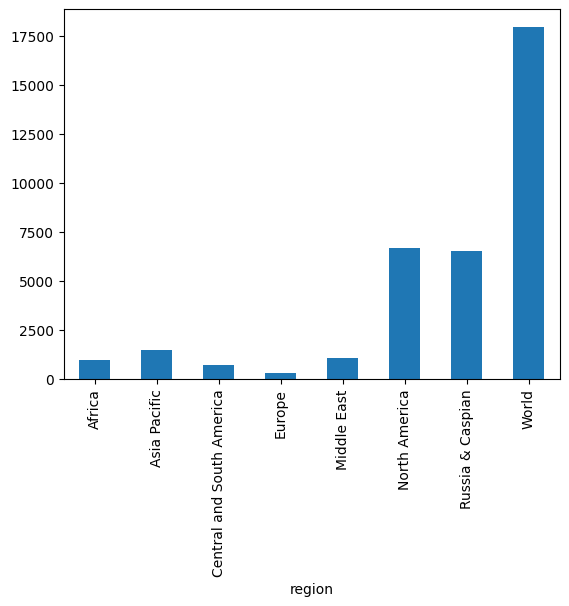

In [23]:
ondf.groupby("region")["emissions"].sum().plot(kind='bar')
# Middle East region has the most emissons from the 'Onshore gas' more than the median emission levels

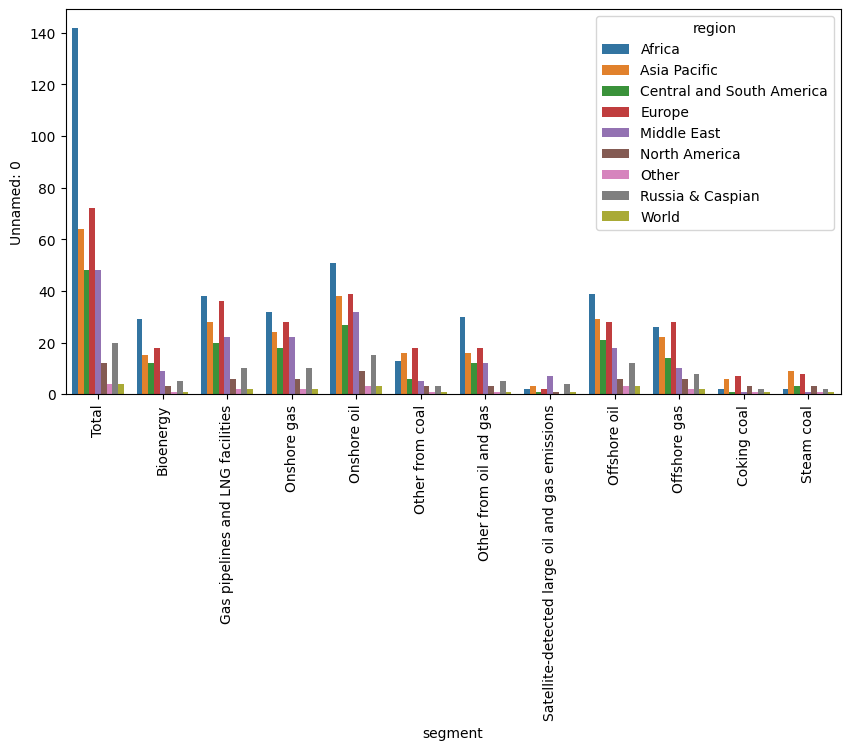

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x=df["segment"], y="Unnamed: 0", estimator="size", hue="region")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='segment'>

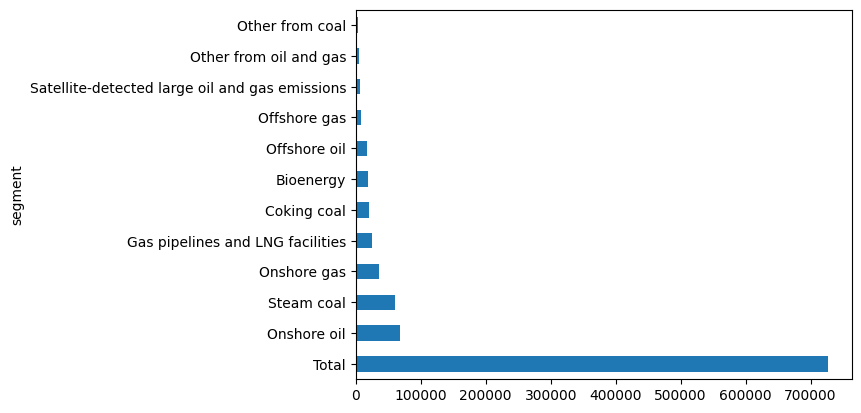

In [25]:
df.groupby("segment")["emissions"].sum().sort_values(ascending=False).plot(kind='barh')

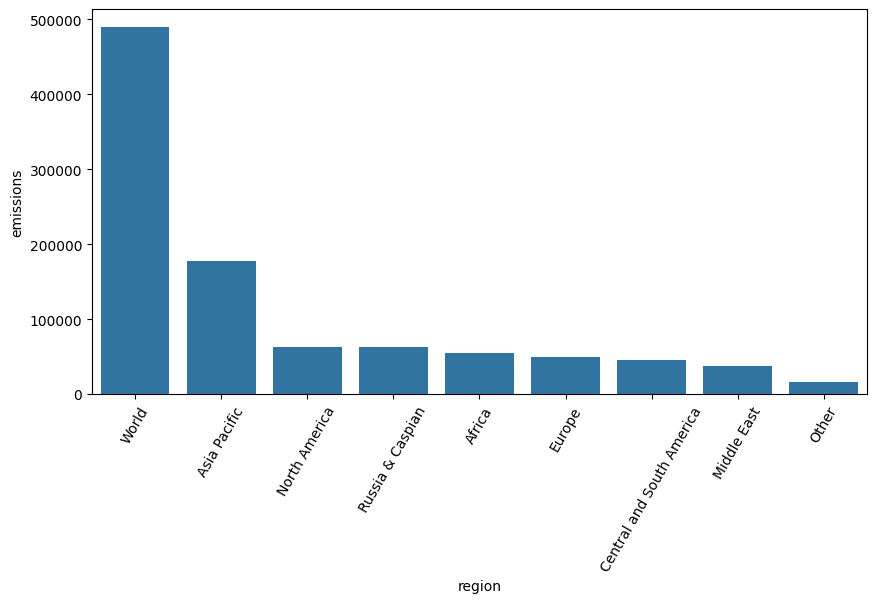

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(df.groupby("region")["emissions"].sum().sort_values(ascending=False))
plt.xticks(rotation=60)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Total'),
  Text(1, 0, 'Bioenergy'),
  Text(2, 0, 'Gas pipelines and LNG facilities'),
  Text(3, 0, 'Onshore gas'),
  Text(4, 0, 'Onshore oil'),
  Text(5, 0, 'Other from coal'),
  Text(6, 0, 'Other from oil and gas'),
  Text(7, 0, 'Satellite-detected large oil and gas emissions'),
  Text(8, 0, 'Offshore oil'),
  Text(9, 0, 'Offshore gas'),
  Text(10, 0, 'Coking coal'),
  Text(11, 0, 'Steam coal')])

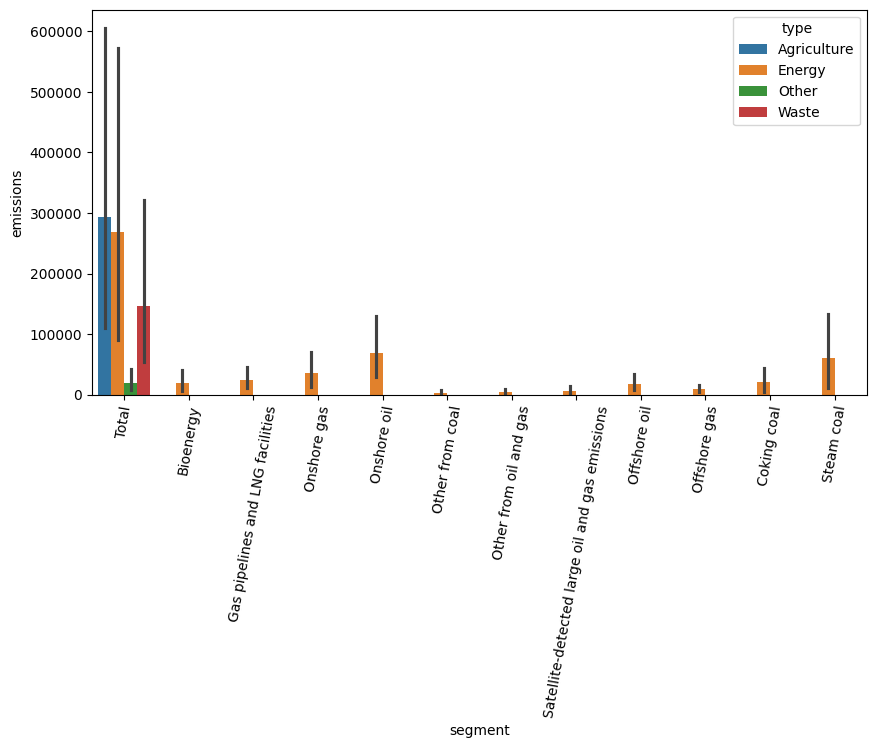

In [27]:
#df.groupby(["type","segment"])["emissions"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="segment", y="emissions", hue="type", estimator="sum")
plt.xticks(rotation=80)

In [42]:
df.groupby("country")["emissions"].sum().sort_values(ascending=False)[:10].reset_index()


,country,emissions
0,World,489152.316956
1,China,81048.371586
2,United States,48604.877296
3,Russia,42432.929804
4,India,34852.007386
5,Brazil,21720.838126
6,Indonesia,19404.469000
7,European Union,18985.173461
8,Other,15997.357175
9,Iran,13030.685366


### Dashboarding using panel library

In [40]:
df.head(3)

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,NA


In [52]:
year_button = pn.widgets.RadioButtonGroup(
    name = "year",
    options = df["baseYear"].unique().tolist(),
    button_type = "success"
)

In [49]:
year_button

RadioButtonGroup(button_type='success', name='year', options=['2019-2021', '2022'], value='2019-2021')

In [53]:
region_selection = pn.widgets.Select(
    name = "region",
    options = df["region"].unique().tolist(),
    value = df["region"].unique().tolist(),
    width = 200
)

In [39]:
region_selection

Select(name='region', options=['Africa', 'Asia Pacific',...], value='Africa', width=200)

In [61]:
# widget for base year selection
year_button = pn.widgets.RadioButtonGroup(
    name = "year",
    options = df["baseYear"].unique().tolist(),
    button_type = "success"
)

# widget for region selction
region_selection = pn.widgets.Select(
    name = "region",
    options = df["region"].unique().tolist(),
    value = df["region"].unique().tolist(),
    width = 200
)

# functime to update the first chart using the Python decorator
@pn.depends(year_button.param.value, region_selection.param.value)
def filtered_df1(year, region):
  filtered_df = df[(df["region"].isin([region])) & (df["baseYear"] == year)]
  grouped_df = filtered_df.groupby("country")["emissions"].sum().sort_values(ascending=False).reset_index()
  return grouped_df.hvplot.bar(x="country", y="emissions", rot=60, xlabel="Country", title="Emissions by country in the selected region")


# function to update the chart with emissions tread region wise
@pn.depends(year_button.param.value, region_selection.param.value)
def filtered_df2(year, region):
  filtered_df = df[(df["region"].isin([region])) & (df["baseYear"] == year)]
  return filtered_df.hvplot.hist(y="emissions", xlabel="Emissions", title="Emissions distribution in the selected region")


# function to update chart with average emissions per segment
@pn.depends(year_button.param.value, region_selection.param.value)
def filtered_df3(year, region):
  filtered_df = df[(df["region"].isin([region])) & (df["baseYear"] == year)]
  grouped_df = filtered_df.groupby("segment")["emissions"].mean().sort_values(ascending=False).reset_index()
  return grouped_df.hvplot.bar(x="segment", y="emissions", rot=60, xlabel="Segment", title="Average emissions per segment in the selected region")

# function to update the chart with total emissions per type of source
@pn.depends(year_button.param.value, region_selection.param.value)
def filtered_df4(year, region):
  filtered_df = df[(df["region"].isin([region])) & (df["baseYear"] == year)]
  grouped_df = filtered_df.groupby("type")["emissions"].sum().sort_values(ascending=False).reset_index()
  return grouped_df.hvplot.bar(x="type", y="emissions", xlabel="Type", title="Average emissions per type in the selected region")

# create dashboard panel layout with grid of plots
dashboard = pn.GridSpec(sizing_mode='stretch_both', max_height=800, ncols=2, nrows=2)
dashboard[0,0] = pn.Column(
    "# Emissions per country",
    pn.Row(year_button, region_selection),
    filtered_df1
)

dashboard[0,1] = pn.Column(
    "# Emissions distribution",
    filtered_df2
)

dashboard[1,0] = pn.Column(
    "# Average emissions per segment",
    filtered_df3
)

dashboard[1,1] = pn.Column(
    "# Total emissions per type",
    filtered_df4
)
dashboard.servable()

GridSpec(max_height=800, ncols=2, nrows=2, sizing_mode='stretch_both')
    [0] Column(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] Row
            [0] RadioButtonGroup(button_type='success', name='year', options=['2019-2021', '2022'], value='2019-2021')
            [1] Select(name='region', options=['Africa', 'Asia Pacific',...], value='Africa', width=200)
        [2] ParamFunction(function, _pane=HoloViews, defer_load=False)
    [1] Column(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] ParamFunction(function, _pane=HoloViews, defer_load=False)
    [2] Column(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] ParamFunction(function, _pane=HoloViews, defer_load=False)
    [3] Column(sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] ParamFunction(function, _pane=HoloViews, defer_load=False)